In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("C:\\Users\\Sreeja\\INST414\\Amazon.csv")

In [17]:
features = ["TotalAmount", "UnitPrice", "Quantity", 
            "ShippingCost", "Discount", "Tax"]

X = df[features].copy()
X = X.fillna(0)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

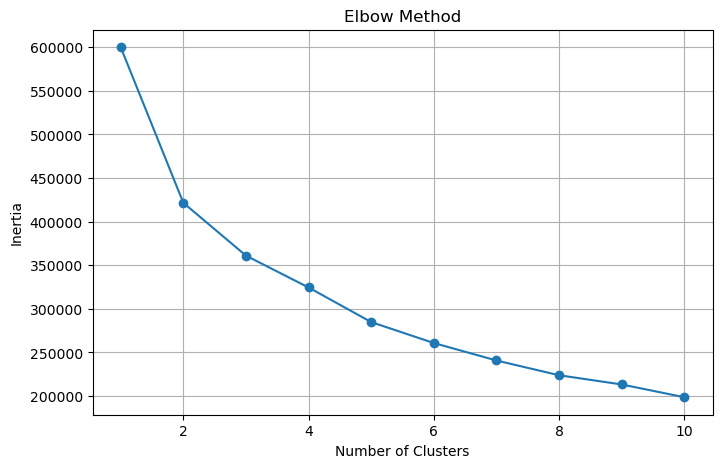

In [ ]:
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot inertia for elbow method
plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
k_optimal = 4  
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init='auto')
df["Cluster"] = kmeans_final.fit_predict(X_scaled)

In [ ]:
cluster_summary = df.groupby("Cluster")[features].mean()
print("Cluster Summary:")
print(cluster_summary)

print("\nCluster Sizes:")
print(df["Cluster"].value_counts())


Cluster Summary:
         TotalAmount   UnitPrice  Quantity  ShippingCost  Discount         Tax
Cluster                                                                       
0        1938.054357  450.779369  4.254123      7.361648  0.063089  159.285789
1         573.725031  177.566554  3.265548     11.441877  0.075754   36.748792
2         759.405431  438.556792  1.753751      7.454172  0.083404   50.475463
3         382.905919  140.955949  2.730990      3.699660  0.074923   25.469777

Cluster Sizes:
Cluster
3    25828
0    25464
2    24991
1    23717
Name: count, dtype: int64


In [ ]:
df.to_csv("Amazon_clustered.csv", index=False)